In [ ]:
# PCA ASSIGNMENT:

In [ ]:
# Importing all the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Task 1: Exploratory Data Analysis (EDA):

In [ ]:
df=pd.read_csv('wine.csv')
df.head()

In [ ]:
df.shape

In [ ]:
df.describe().T

In [ ]:
# finding missing values if any:
# No missing values
df.isna().sum()

In [ ]:
#Histplots for all the numerical variables:
for i in df.iloc[0:1,1:]:
    plt.hist(df[i],edgecolor='black',bins=30)
    plt.xlabel(f'{i}')
    plt.ylabel('Count')
    plt.show()

In [ ]:
#Few insights:
# alcohol: normal distribution with no outliers
# malic: positvely skewed with outliers more than 5
# Ash: Normal distribution with few outliers
# alcalinity: Normal distribution

In [ ]:
# box for all the numerical variables:
for i in df.iloc[0:1,1:]:
    sns.boxplot(df[i])
    plt.xlabel(f'{i}')
    plt.show() 

In [ ]:
# Bar Plot for the count variable:
counts = df['Type'].value_counts()
plt.figure(figsize=(8, 6))  
counts.plot(kind='bar', color='skyblue')
plt.title('Count of Type')
plt.xticks(rotation=0)  
plt.tight_layout()

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.iloc[:,1:].corr(),annot=True,linewidths=0.8,fmt=".2f",cmap="coolwarm")
plt.show()

In [ ]:
# Observations:
# Flavinoids seem to have high +ve correlation with phenols
# Flavinoids seem to have high +ve correlation with dilution
# Flavinoids seem to have high -ve correlation with nonflavinoids

In [ ]:
# Task 2: Dimensionality Reduction with PCA:

In [ ]:
# dropping the categorical column:
newdf=df.drop('Type',axis='columns')
scaleddf=newdf.copy()

In [ ]:
# Now apply the formula 
# zscore= value-mean/standard deviation
for i in newdf.iloc[0:1,0:]:
    scaleddf[i]=(scaleddf[i]-scaleddf[i].mean())/scaleddf[i].std()

In [ ]:
scaleddf.head()

In [ ]:
scaleddf.describe().T

In [ ]:
# Implementing PCA to the scaled dataset:

In [ ]:
# With retaining 80 percent of the information we get only 5 features compared to the original df
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(scaleddf)
pca_fit = pca.fit(scaleddf)
print(X_pca.shape)
print(scaleddf.shape)

In [ ]:
X_pca

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
# from the plot we understand that 5 components explain 82 percent of total variation in the dataset
print(pca.explained_variance_ratio_)

In [ ]:
# transforming original dataset to principal components
pcadf=pd.DataFrame(X_pca,columns=[['PC1','PC2','PC3','PC4','PC5']])
pcadf.head()

In [ ]:
# Task 3: Clustering with Original Data:

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# for K-elbow;
# We have K = 5
kmeans=KMeans(n_init='auto')
visualizer=KElbowVisualizer(kmeans,k=(1,20))
visualizer.fit(scaleddf)
visualizer.poof()
plt.show()

In [ ]:
# Applying the algorithm:
km=KMeans(n_clusters=5,init="k-means++").fit(scaleddf)
km

In [ ]:
scaleddf['ClusterNo']=km.labels_
scaleddf.head()

In [ ]:
# for visualizing:
scaleddf.ClusterNo.value_counts()

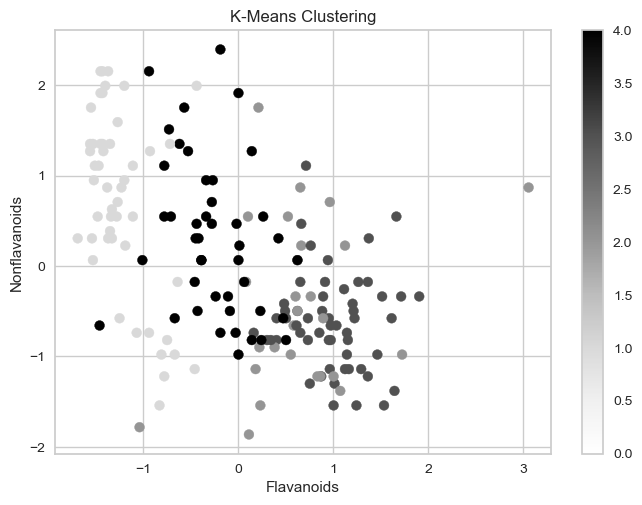

In [117]:
# for visualizing:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(scaleddf['Flavanoids'],scaleddf['Nonflavanoids'],c=scaleddf['ClusterNo'],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Flavanoids')
ax.set_ylabel('Nonflavanoids')
plt.colorbar(scatter)


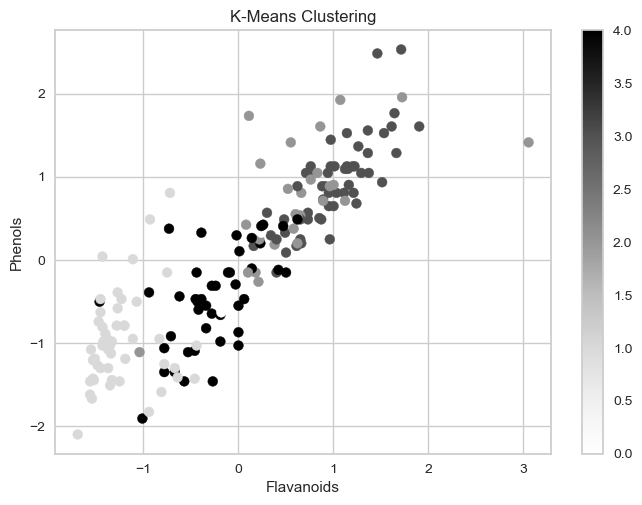

In [116]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(scaleddf['Flavanoids'],scaleddf['Phenols'],c=scaleddf['ClusterNo'],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Flavanoids')
ax.set_ylabel('Phenols')
plt.colorbar(scatter)

In [ ]:
# Calculating silhoutte score:
# higher value indicates that the clusters are well-separated from each other and cohesive within.
from sklearn.metrics import silhouette_score

In [115]:
# Calculate silhouette score
features = scaleddf.drop(columns=['ClusterNo'])
clusters = scaleddf['ClusterNo']
sil_score = silhouette_score(features, clusters)

print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.26024519717161065


In [ ]:
# Task 4: Clustering with PCA Data:

In [ ]:
# for K-elbow;
# We have K = 5
kmeans=KMeans(n_init='auto')
visualizer=KElbowVisualizer(kmeans,k=(1,20))
visualizer.fit(pcadf)
visualizer.poof()
plt.show()

In [108]:
# Applying the algorithm:
km=KMeans(n_clusters=5,init="k-means++").fit(pcadf)
km

D:\Coding\DS\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Coding\DS\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [109]:
pcadf['ClusterNo']=km.labels_
pcadf.head()

,PC1,PC2,PC3,PC4,PC5,ClusterNo
0,3.307421,-1.439402,-0.165273,-0.215025,0.691093,0
1,2.203250,0.332455,-2.020757,-0.290539,-0.256930,0
2,2.509661,-1.028251,0.980054,0.722863,-0.250327,0
3,3.746497,-2.748618,-0.175696,0.566386,-0.310964,0
4,1.006070,-0.867384,2.020987,-0.408613,0.297618,0


In [110]:
# for visualizing:
pcadf.ClusterNo.value_counts()

(ClusterNo,)
0               56
1               48
2               29
4               24
3               21
Name: count, dtype: int64

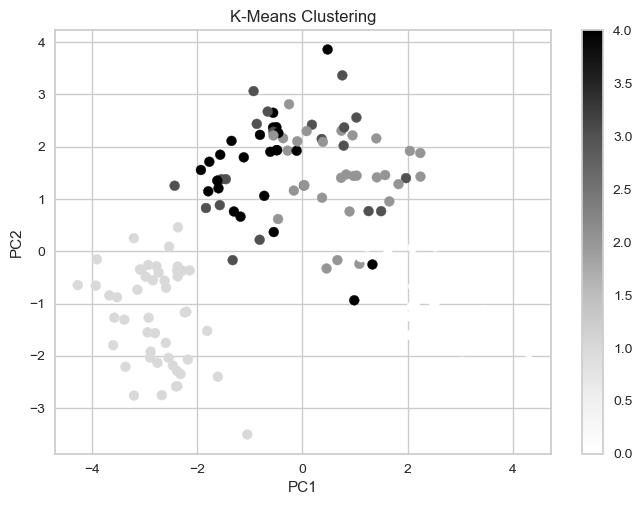

In [112]:
# for visualizing:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(pcadf['PC1'],pcadf['PC2'],c=pcadf['ClusterNo'],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.colorbar(scatter)

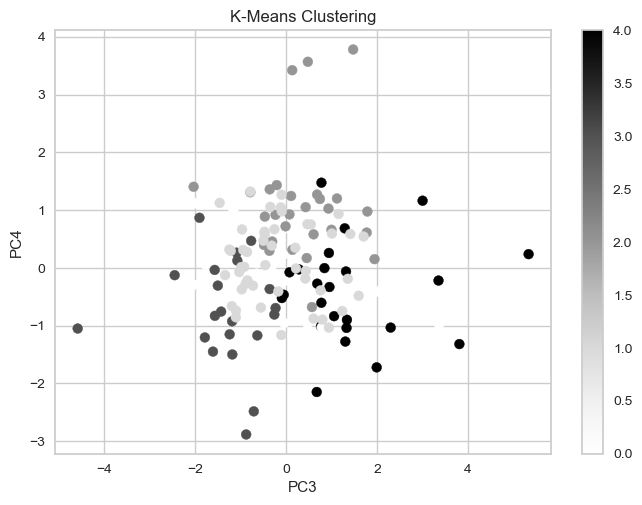

In [113]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(pcadf['PC3'],pcadf['PC4'],c=pcadf['ClusterNo'],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('PC3')
ax.set_ylabel('PC4')
plt.colorbar(scatter)

In [114]:
# Calculate silhouette score
features = pcadf.drop(columns=['ClusterNo'])
clusters = pcadf['ClusterNo']
sil_score = silhouette_score(features, clusters)

print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.31934524502457085


D:\Coding\DS\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Task 5: Comparison and Analysis:

In [ ]:
# Silhouette score for clustering with original data scaleddf: 0.26024519717161065.
# Silhouette score for clustering with pca data pcadf        : 0.31934524502457085.
# We can say that the clustering has improved after performing the dimensionality reduction using PCA.
# The datapoints in the original data scatterplot were more dispersed compared to the datapoints in the pcadata scatterplot.

In [118]:
# Task 6: Conclusion and Insights:

In [ ]:
# The problem with using PCA is that the model accuracy decreases compared to the original data set.
# It is always important to standardize the data before applying pca.
# PCA is a technique that can be used to remove the less impactful features in a data set.
# In doing so one can easily train and test the model and also visualize the model.
# It is recommended to use PCA when there are a lot of features in the dataset